In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
coin_markets_df=pd.read_csv('csv_monedas/coin_markets_df')
coin_markets_df= coin_markets_df.drop(['image','last_updated'],axis=1)

In [7]:
coin_markets_df

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi
0,render-token,rndr,Render,1.460000,543903475,69,776604953,25730892,1.480000,1.360000,...,3.719085e+08,5.310243e+08,5.310243e+08,8.780000,-83.35035,2021-11-21T10:03:19.097Z,0.036657,3889.28546,2020-06-16T13:22:25.900Z,NaN
1,akash-network,akt,Akash Network,1.480000,323528301,104,578401085,5310592,1.550000,1.370000,...,2.173291e+08,2.173287e+08,3.885390e+08,8.070000,-81.54458,2021-04-06T18:59:48.484Z,0.164994,803.22684,2022-11-21T20:30:53.727Z,NaN
2,singularitynet,agix,SingularityNET,0.180732,221960170,143,360183362,29090752,0.181768,0.170213,...,1.232484e+09,1.324917e+09,2.000000e+09,0.950230,-81.05441,2018-01-28T00:00:00.000Z,0.007472,2309.48314,2020-03-13T02:24:16.528Z,"{'times': 0.807323087764063, 'currency': 'usd'..."
3,fetch-ai,fet,Fetch.ai,0.207269,216365873,145,239078313,28218315,0.209295,0.196169,...,1.043463e+09,1.152998e+09,1.152998e+09,1.170000,-82.29718,2021-09-08T02:24:24.858Z,0.008170,2439.61606,2020-03-13T02:24:18.347Z,"{'times': 1.3906495260483391, 'currency': 'usd..."
4,ocean-protocol,ocean,Ocean Protocol,0.309076,133970637,202,435223314,15027394,0.309344,0.295093,...,4.340268e+08,1.410000e+09,1.410000e+09,1.930000,-84.04421,2021-04-10T09:24:58.915Z,0.012848,2296.74706,2019-08-11T00:00:00.000Z,"{'times': 1.5756314240942366, 'currency': 'usd..."
5,origintrail,trac,OriginTrail,0.223521,85515767,258,111698149,866770,0.224277,0.211207,...,3.827985e+08,5.000000e+08,5.000000e+08,3.500000,-93.61635,2021-11-03T18:09:57.627Z,0.003853,5707.55783,2020-03-13T02:24:12.031Z,"{'times': 1.235205926692715, 'currency': 'usd'..."
6,iexec-rlc,rlc,iExec RLC,1.043000,75482676,288,90725966,7114235,1.061000,1.018000,...,7.238255e+07,8.699978e+07,8.699978e+07,15.510000,-93.27136,2021-05-10T17:59:51.557Z,0.153815,578.51646,2018-12-15T00:00:00.000Z,NaN
7,numeraire,nmr,Numeraire,11.390000,71776712,296,125742763,2045320,11.470000,11.150000,...,6.279040e+06,1.084589e+07,1.100000e+07,93.150000,-87.75750,2021-05-16T10:29:06.362Z,2.060000,452.45458,2018-11-27T00:00:00.000Z,NaN
8,everipedia,iq,IQ,0.004363,71440695,297,91506876,244035,0.004474,0.004253,...,1.639499e+10,1.639499e+10,2.100000e+10,0.072382,-93.97683,2018-07-16T07:35:38.970Z,0.000630,591.49419,2020-03-13T02:29:15.457Z,NaN
9,insure,sure,inSure DeFi,0.002652,70011955,304,232810696,197012,0.002839,0.002407,...,2.646378e+10,8.800000e+10,8.800000e+10,0.113970,-97.66957,2021-01-06T21:22:32.766Z,0.000156,1601.89616,2021-06-28T04:52:56.935Z,NaN


# Análisis de diferentes tokens en términos de precio

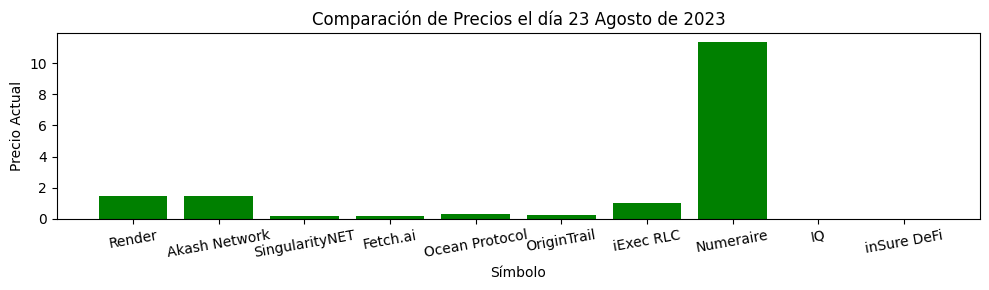

In [9]:
plt.figure(figsize=(10, 3))
plt.bar(coin_markets_df['name'], coin_markets_df['current_price'], color='green')
plt.xlabel('Símbolo')
plt.ylabel('Precio Actual')
plt.title('Comparación de Precios el día 23 Agosto de 2023')
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()


+ El token que poseen el precio más alto es Numeraire

+ El token que posee el precio más bajo es INSURE

# KPI: Cambio diario de precio y su porcentaje 

In [10]:
# Selecciamos las columnas
cambio_precio = coin_markets_df[['symbol','name', 'current_price', 'high_24h', 'low_24h']]
#Se calcula el cambio de precio absoluto
cambio_precio['Cambio_precio'] = cambio_precio['current_price'] - cambio_precio['low_24h']
#Se calcula el porcentaje de cambio: dividiendo el cambio diario de precio entre el precio más bajo en las últimas 24 horas
cambio_precio['Cambio_precio_porcentaje'] = (cambio_precio['Cambio_precio'] / cambio_precio['low_24h']) * 100
columnas={'symbol':'simbolo','name':'nombre', 'current_price':'precio_actual', 'high_24h':'max_24h', 'low_24h':'min_24h'}
cambio_precio.rename(columns=columnas, inplace=True)
cambio_precio


C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\1783438517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cambio_precio['Cambio_precio'] = cambio_precio['current_price'] - cambio_precio['low_24h']
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\1783438517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cambio_precio['Cambio_precio_porcentaje'] = (cambio_precio['Cambio_precio'] / cambio_precio['low_24h']) * 100
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\1783438517.py:8: SettingWithC

,simbolo,nombre,precio_actual,max_24h,min_24h,Cambio_precio,Cambio_precio_porcentaje
0,rndr,Render,1.460000,1.480000,1.360000,0.100000,7.352941
1,akt,Akash Network,1.480000,1.550000,1.370000,0.110000,8.029197
2,agix,SingularityNET,0.180732,0.181768,0.170213,0.010519,6.179904
3,fet,Fetch.ai,0.207269,0.209295,0.196169,0.011100,5.658386
4,ocean,Ocean Protocol,0.309076,0.309344,0.295093,0.013983,4.738506
5,trac,OriginTrail,0.223521,0.224277,0.211207,0.012314,5.830299
6,rlc,iExec RLC,1.043000,1.061000,1.018000,0.025000,2.455796
7,nmr,Numeraire,11.390000,11.470000,11.150000,0.240000,2.152466
8,iq,IQ,0.004363,0.004474,0.004253,0.000110,2.583207
9,sure,inSure DeFi,0.002652,0.002839,0.002407,0.000245,10.173393


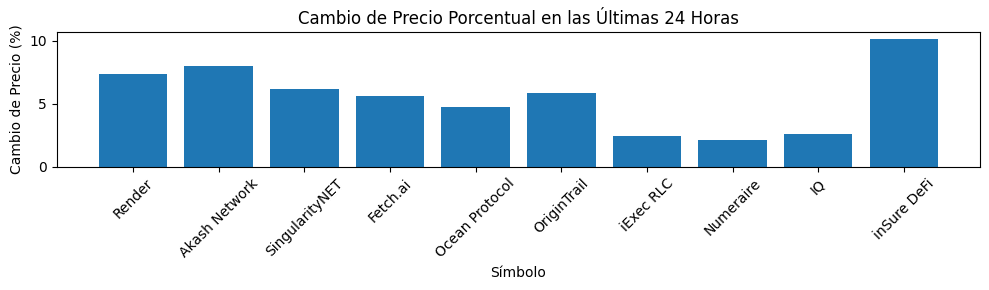

In [7]:
plt.figure(figsize=(10, 3))
plt.bar(cambio_precio['nombre'], cambio_precio['Cambio_precio_porcentaje'])
plt.xlabel('Símbolo')
plt.ylabel('Cambio de Precio (%)')
plt.title('Cambio de Precio Porcentual en las Últimas 24 Horas')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

+ El token que presenta el porcentaje de cambio de precio más alto en las últimas 24 h, el día 23 de agosto del 2023 es para el token Insure. Un alto cambio diario de precio podría indicar una mayor posibilidad de ganancias, pero también un mayor riesgo de pérdidas.
+ El token que presenta el porcentaje de cambio más bajo en las últimas 24 h, el día 23 de agosto del 2023 es para el token Numerarire

# KPI: suministro circulante, total y máximo de los tokens

es una práctica importante para comprender la estructura y la escasez de un activo criptográfico

In [12]:
suministro_circulante= coin_markets_df[['name','circulating_supply','total_supply', 'max_supply']]
#Se calcula una nueva columna que indica el porcetaje de suministro circulante con respecto al suministro total
suministro_circulante['porcentaje']=(suministro_circulante['circulating_supply']* 100)/suministro_circulante['total_supply']

nuevos_nombres = {'name': 'Nombre', 'circulating_supply': 'suministro_circulante', 'total_supply':'suministro_total','max_supply':'suministro_max','porcentaje':'porcentaje_suministro_circulante'}
suministro_circulante.rename(columns=nuevos_nombres, inplace=True)
suministro_circulante['restante']=suministro_circulante['suministro_total']- suministro_circulante['suministro_circulante']
suministro_circulante

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\4216861021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suministro_circulante['porcentaje']=(suministro_circulante['circulating_supply']* 100)/suministro_circulante['total_supply']
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\4216861021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suministro_circulante.rename(columns=nuevos_nombres, inplace=True)
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\4216861021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Nombre,suministro_circulante,suministro_total,suministro_max,porcentaje_suministro_circulante,restante
0,Render,3.719085e+08,5.310243e+08,5.310243e+08,70.036055,1.591158e+08
1,Akash Network,2.173291e+08,2.173287e+08,3.885390e+08,100.000173,-3.751635e+02
2,SingularityNET,1.232484e+09,1.324917e+09,2.000000e+09,93.023497,9.243288e+07
3,Fetch.ai,1.043463e+09,1.152998e+09,1.152998e+09,90.500000,1.095348e+08
4,Ocean Protocol,4.340268e+08,1.410000e+09,1.410000e+09,30.782045,9.759732e+08
5,OriginTrail,3.827985e+08,5.000000e+08,5.000000e+08,76.559700,1.172015e+08
6,iExec RLC,7.238255e+07,8.699978e+07,8.699978e+07,83.198537,1.461724e+07
7,Numeraire,6.279040e+06,1.084589e+07,1.100000e+07,57.893252,4.566853e+06
8,IQ,1.639499e+10,1.639499e+10,2.100000e+10,100.000000,0.000000e+00
9,inSure DeFi,2.646378e+10,8.800000e+10,8.800000e+10,30.072482,6.153622e+10


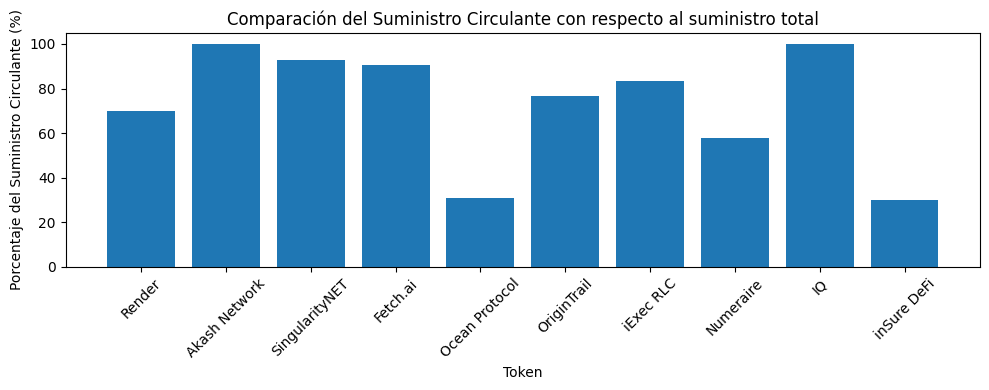

In [72]:
plt.figure(figsize=(10, 4))
plt.bar(suministro_circulante['Nombre'], suministro_circulante['porcentaje_suministro_circulante'],)
plt.xlabel('Token')
plt.ylabel('Porcentaje del Suministro Circulante (%)')
plt.title('Comparación del Suministro Circulante con respecto al suministro total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




+ Las monedas cuyo suministro total está en circulación son: IQ,Akash. 

Todos los tokens que están destinados a estar disponibles para el comercio y la inversión ya están en el mercado. Esto puede llevar a una mayor liquidez y facilidad de comercio, ya que no hay restricciones en la cantidad de tokens disponibles para comprar y vender.Significa que el equipo de desarrollo no está reteniendo una parte significativa de los tokens para sí mismos o para otros fines. Si todos los tokens están en circulación, podría haber una percepción de escasez entre los inversores. La oferta limitada podría aumentar la demanda y potencialmente influir en el aumento del precio del token si la adopción y el interés en el proyecto crecen.

+ Las monedas cuyo porcentaje circulante es menor al total son: inSure DeFi (30.072482) y Ocean Protoco (30.782045)

+ Para el token Akash , se puede apreciar que el suministro circulante es mayor al suministro total pero menor al suministro_max. Esto podría indicar una estrategia de liberación gradual de tokens, un enfoque en la escasez percibida y un equilibrio entre el control del equipo y la influencia del mercado.



# KPI: Relación volumen-capitalización

Esta relación proporciona información sobre la liquidez y la actividad de negociación del activo en el mercado. Cuanto mayor sea este valor, mayor será la actividad de trading en relación con la capitalización de mercado.

In [15]:
#Se seleccionana las columnas para calcular la relación
relacion_volumen_capitalizacion= coin_markets_df[['name','circulating_supply','current_price','total_volume']]
nuevos_nombres = {'name': 'Nombre', 'circulating_supply': 'suministro_circulante', 'current_price':'precio_actual','total_volume':'vol_total'}
relacion_volumen_capitalizacion.rename(columns=nuevos_nombres, inplace=True)
relacion_volumen_capitalizacion

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\1474930298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacion_volumen_capitalizacion.rename(columns=nuevos_nombres, inplace=True)


,Nombre,suministro_circulante,precio_actual,vol_total
0,Render,3.719085e+08,1.460000,25730892
1,Akash Network,2.173291e+08,1.480000,5310592
2,SingularityNET,1.232484e+09,0.180732,29090752
3,Fetch.ai,1.043463e+09,0.207269,28218315
4,Ocean Protocol,4.340268e+08,0.309076,15027394
5,OriginTrail,3.827985e+08,0.223521,866770
6,iExec RLC,7.238255e+07,1.043000,7114235
7,Numeraire,6.279040e+06,11.390000,2045320
8,IQ,1.639499e+10,0.004363,244035
9,inSure DeFi,2.646378e+10,0.002652,197012


In [16]:
# Calcular la relación entre el volumen y la capitalización de mercado
# Primero se calcula la capitalización de mercado
relacion_volumen_capitalizacion['market_cap'] = relacion_volumen_capitalizacion['precio_actual'] * relacion_volumen_capitalizacion['suministro_circulante']
relacion_volumen_capitalizacion['relacion_vol_mc'] = relacion_volumen_capitalizacion['vol_total'] /relacion_volumen_capitalizacion['market_cap']
relacion_volumen_capitalizacion

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\315062621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacion_volumen_capitalizacion['market_cap'] = relacion_volumen_capitalizacion['precio_actual'] * relacion_volumen_capitalizacion['suministro_circulante']
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_13364\315062621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacion_volumen_capitalizacion['relacion_vol_mc'] = relacion_volumen_capitalizacion['vol_total'] /relacion_volumen_capitalizaci

,Nombre,suministro_circulante,precio_actual,vol_total,market_cap,relacion_vol_mc
0,Render,3.719085e+08,1.460000,25730892,5.429863e+08,0.047388
1,Akash Network,2.173291e+08,1.480000,5310592,3.216470e+08,0.016511
2,SingularityNET,1.232484e+09,0.180732,29090752,2.227494e+08,0.130599
3,Fetch.ai,1.043463e+09,0.207269,28218315,2.162775e+08,0.130473
4,Ocean Protocol,4.340268e+08,0.309076,15027394,1.341473e+08,0.112022
5,OriginTrail,3.827985e+08,0.223521,866770,8.556350e+07,0.010130
6,iExec RLC,7.238255e+07,1.043000,7114235,7.549500e+07,0.094235
7,Numeraire,6.279040e+06,11.390000,2045320,7.151826e+07,0.028599
8,IQ,1.639499e+10,0.004363,244035,7.153316e+07,0.003411
9,inSure DeFi,2.646378e+10,0.002652,197012,7.016899e+07,0.002808


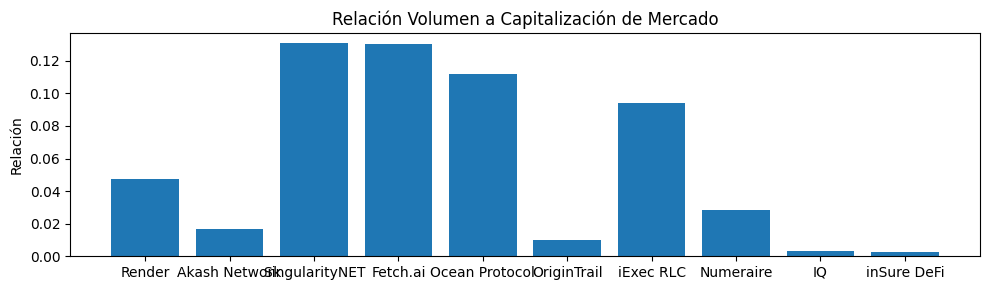

In [18]:
plt.figure(figsize=(10, 3))
plt.bar(relacion_volumen_capitalizacion['Nombre'], relacion_volumen_capitalizacion['relacion_vol_mc'])

# Agregar título y etiquetas a los ejes
plt.title('Relación Volumen a Capitalización de Mercado')
plt.ylabel('Relación')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

+ Los activos "SingularityNET" y "Fetch.ai" tienen relacionesaltas (0.13). Esto sugiere que hay un alto nivel de actividad de compra y venta en el mercado para ese activo, es decir, los inversores pueden comprar o vender grandes cantidades de ese activo sin afectar significativamente su precio.

+ Por otro lado, "inSure DeFi" tiene una relación baja (0.002808), esto podría sugerir que hay menos transacciones ocurriendo en el mercado, lo que podría dificultar la ejecución de operaciones grandes sin afectar el precio. En un mercado con baja liquidez, incluso operaciones relativamente pequeñas pueden tener un impacto más significativo en el precio.

+ El activo "Render" tiene una relación intermedia (alrededor de 0.05), lo que indica una actividad de negociación moderada en relación con su capitalización de mercado.
 


